# RAINFALL Prediction Using Machine Learning

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score
import pickle

In [51]:
df=pd.read_csv('Rainfall.csv')

In [52]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [53]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [54]:
df.shape

(366, 12)

In [55]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [56]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [58]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [59]:
#remove extra spaces in all column
df.columns=df.columns.str.strip()

In [60]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [62]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

### Handling missing values

In [63]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [64]:
df['winddirection']=df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed']=df['winddirection'].fillna(df['windspeed'].median())

In [65]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [66]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [67]:
### Converting yes  and no to 0 and 1
df['rainfall']=df['rainfall'].map({"yes": 1,"no": 0})

In [68]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,80.0
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,50.0
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,40.0
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,50.0
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,40.0


## Exploratory Data Analysis

In [69]:
df.shape

(366, 12)

In [70]:
df.drop('day',axis=1,inplace=True)

In [71]:
df.shape

(366, 11)

In [72]:
# setting plot style for all the plots
sns.set(style='whitegrid')

In [73]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,101.284153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,81.722827
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,10.000000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,40.000000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,70.000000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,190.000000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,350.000000


In [74]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

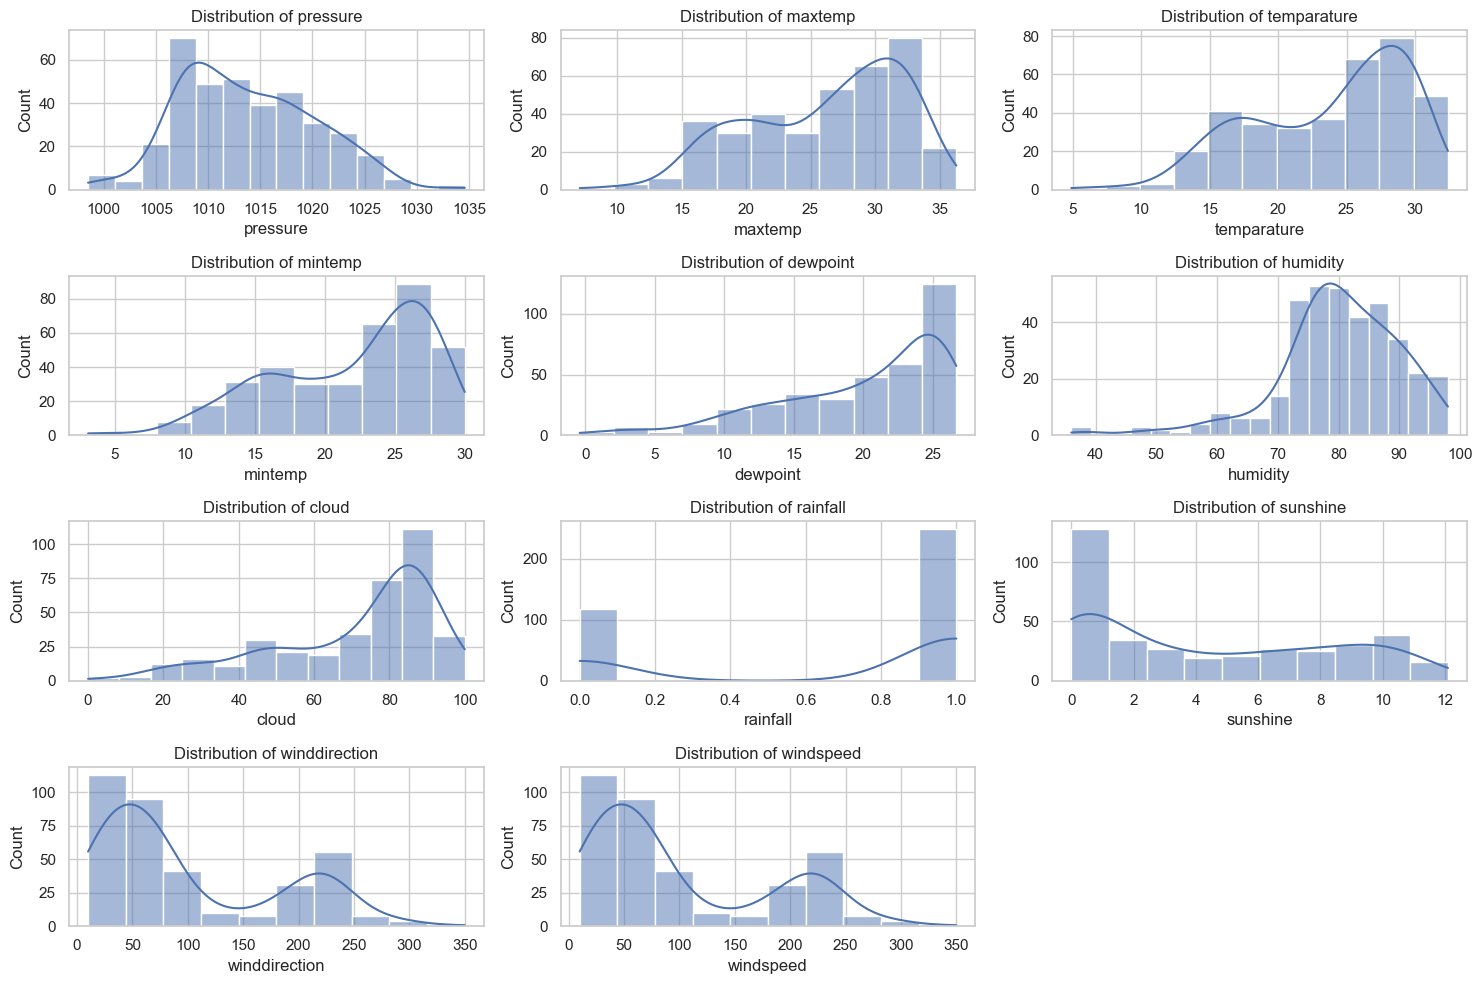

In [75]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'], 1):
    
    plt.subplot(4, 3, i)
    sns.histplot(df[column],kde=True)
    plt.title(f"Distribution of {column}")
    
plt.tight_layout()
plt.show()

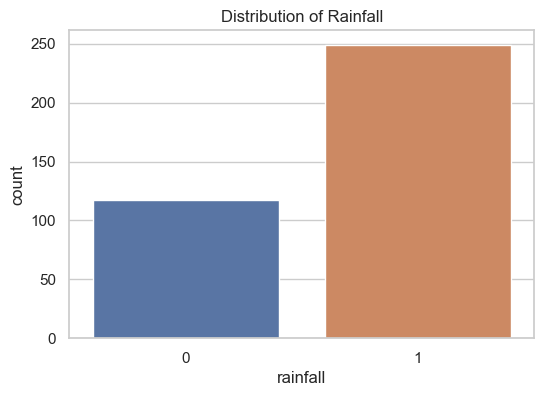

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x='rainfall',data=df)
plt.title('Distribution of Rainfall')
plt.show()

## Correlation Matrix

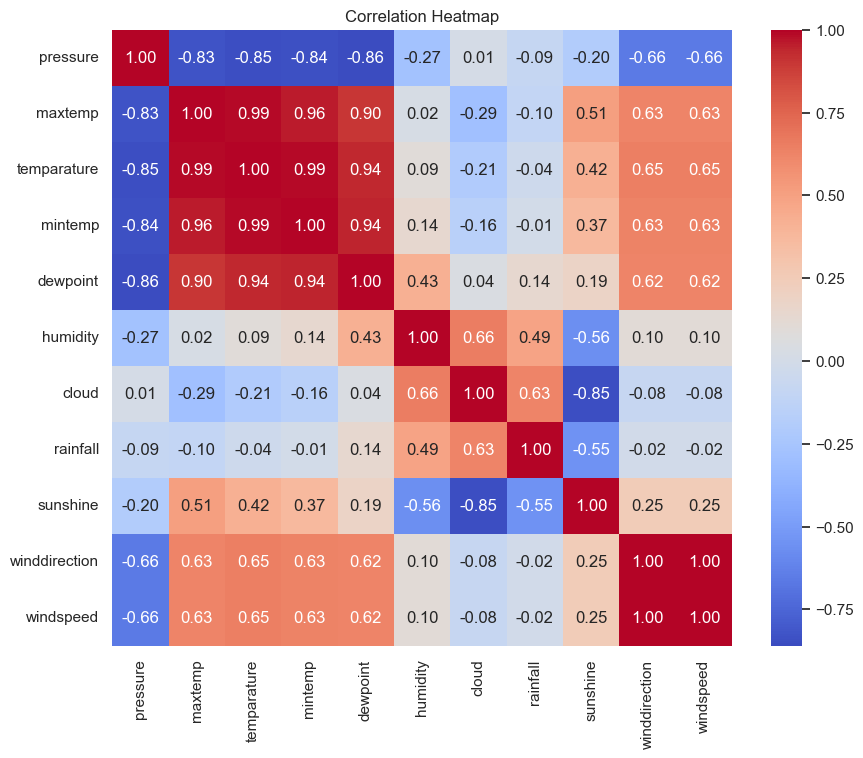

In [77]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


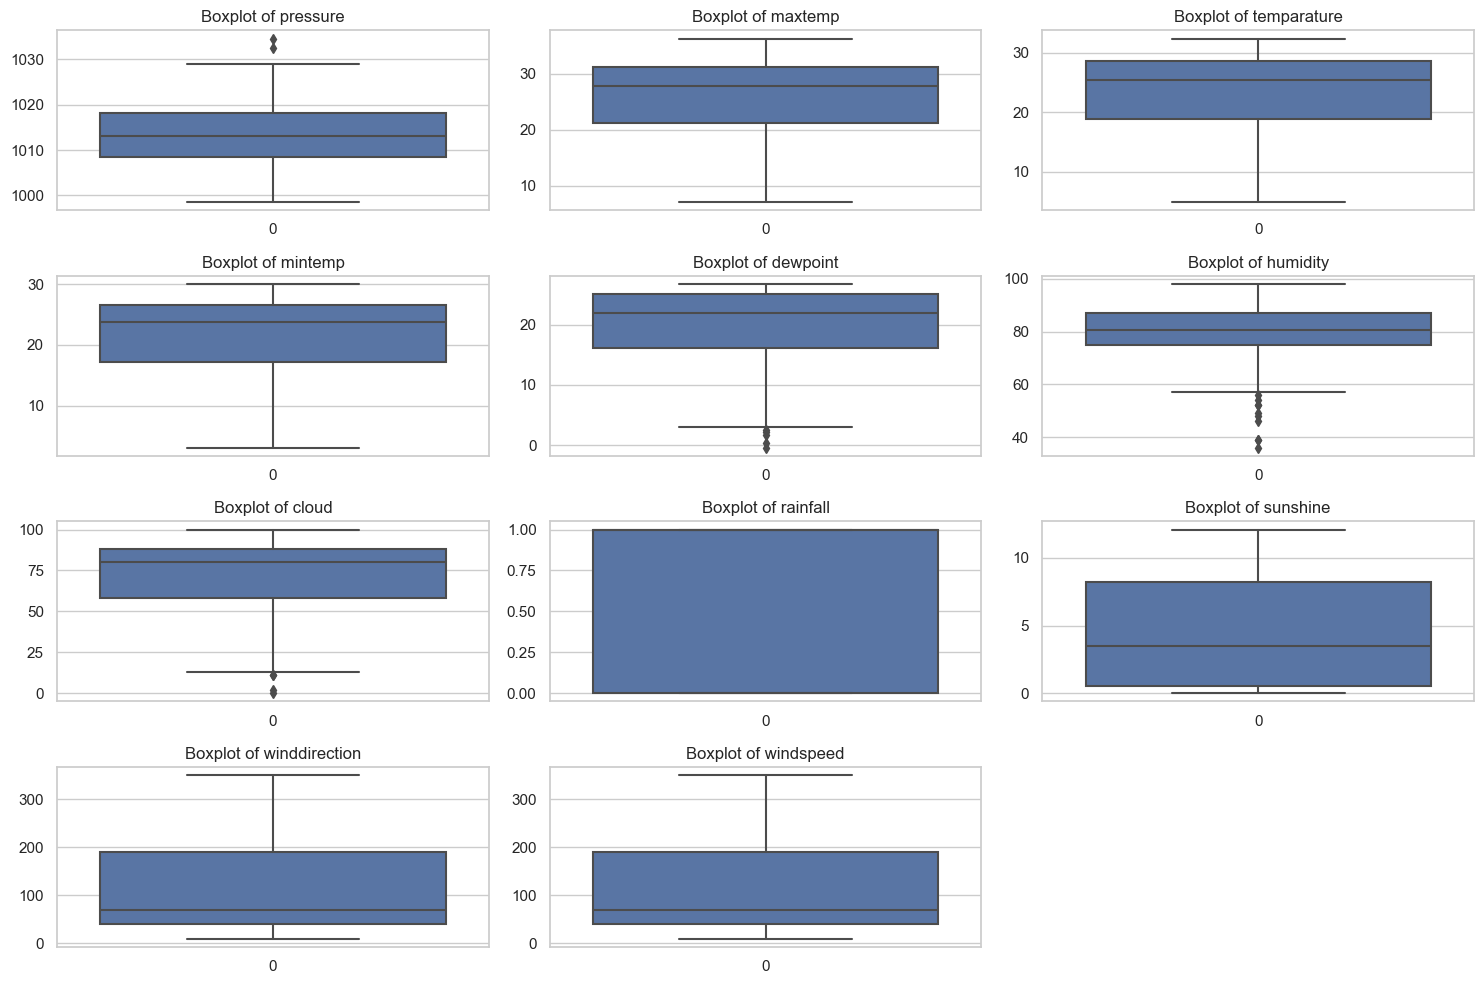

In [83]:
plt.figure(figsize=(15,10))

for i ,column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'], 1):
    
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    
plt.tight_layout()
plt.show()

## Data Preprocessing

In [86]:
# Drop highly correlated column 
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [87]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,80.0
1,1022.0,15.6,81,83,1,0.6,50.0,50.0
2,1019.7,18.4,95,91,1,0.0,40.0,40.0
3,1018.9,18.8,90,88,1,1.0,50.0,50.0
4,1015.9,19.9,95,81,1,0.0,40.0,40.0


In [88]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [90]:
## Separate Minority and Majority class
df_majority = df[df['rainfall']==1]
df_minority = df[df['rainfall']==0]

In [91]:
df_majority.shape

(249, 8)

In [93]:
df_minority.shape

(117, 8)

In [94]:
## Downsample majority class to match minority count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [95]:
df_majority_downsampled.shape

(117, 8)

In [96]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])

In [97]:
df_downsampled.shape

(234, 8)

In [98]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,270.0
9,1017.5,15.5,85,91,1,0.0,70.0,70.0
137,1012.3,20.1,80,86,1,0.3,80.0,80.0
89,1018.3,16.3,79,89,1,2.4,40.0,40.0
157,1008.8,24.7,91,80,1,2.2,20.0,20.0


### Suffling the final DataFrame

In [101]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

## Splitting the data into Training Data and Test data

In [104]:
x= df_downsampled.drop('rainfall',axis=1)
y=df_downsampled['rainfall']

In [105]:
x

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,10.5,270.0,270.0
9,1017.5,15.5,85,91,0.0,70.0,70.0
137,1012.3,20.1,80,86,0.3,80.0,80.0
89,1018.3,16.3,79,89,2.4,40.0,40.0
157,1008.8,24.7,91,80,2.2,20.0,20.0
...,...,...,...,...,...,...,...
351,1025.9,-0.4,39,25,9.1,20.0,20.0
352,1026.4,3.1,48,11,9.5,40.0,40.0
353,1025.4,8.7,62,71,2.1,30.0,30.0
360,1020.6,13.3,74,87,0.6,30.0,30.0


In [106]:
y

188    1
9      1
137    1
89     1
157    1
      ..
351    0
352    0
353    0
360    0
365    0
Name: rainfall, Length: 234, dtype: int64

In [115]:
## Splitting the Data into Training Data and Testing Data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Training

In [121]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf={
    'n_estimators': [50,100,200],
    'max_features': ['sqrt','log2'],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

 ### Hypertuning using GridSearchCV

In [122]:
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [125]:
best_rf_model=grid_search_rf.best_estimator_
print('Best parameter for Random forest:',grid_search_rf.best_params_)


Best parameter for Random forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Model Evaluation

In [126]:
cv_scores=cross_val_score(best_rf_model,x_train,y_train,cv=5)
print('Cross Validation scores:',cv_scores)
print('Mean Cross Validation scores:',np.mean(cv_scores))

Cross Validation scores: [0.78947368 0.73684211 0.83783784 0.83783784 0.81081081]
Mean Cross Validation scores: 0.802560455192034


## Test set performance

In [129]:
y_pred = best_rf_model.predict(x_test)

print('Test set Accuracy:',accuracy_score(y_test,y_pred))
print('Test set Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[20  6]
 [ 6 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.71      0.71      0.71        21

    accuracy                           0.74        47
   macro avg       0.74      0.74      0.74        47
weighted avg       0.74      0.74      0.74        47



## Prediction on unknown data

In [130]:
x_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

## Unknown Data

In [134]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print('Prediction result:','Rainfall' if prediction[0]==1 else'No Rainfall')

Prediction result: Rainfall


In [136]:
input_data = (1026,13,74,66,5.7,20.0,23.3)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print('Prediction result:','Rainfall' if prediction[0]==1 else'No Rainfall')

Prediction result: No Rainfall


In [137]:
input_data = (1000,18,55,45,7.5,22.0,25.8)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print('Prediction result:','Rainfall' if prediction[0]==1 else'No Rainfall')

Prediction result: No Rainfall


In [140]:
input_data = (1018.3,20.0,90,85,2.0,40.3,14.3)
input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

prediction = best_rf_model.predict(input_df)
print('Prediction result:','Rainfall' if prediction[0]==1 else'No Rainfall')

Prediction result: Rainfall


### Save model and feature names to a pickle file

In [141]:
model_data={'model':best_rf_model,"feature_names":x.columns.tolist()}

with open('Rainfall_prediction_model.pkl','wb') as file:
    pickle.dump(model_data,file)

## Load the  save model and file and use it for prediction 

In [142]:
import pickle
import pandas as pd

In [143]:
# load the trained model and feature names from the pickle file
with open ('Rainfall_prediction_model.pkl','rb') as file:
    model_data = pickle.load(file)

In [144]:
model= model_data['model']
feature_names = model_data['feature_names']

In [145]:
input_data= (1026,13,74,66,5.7,20.0,23.3)

input_df=pd.DataFrame([input_data],columns=feature_names)

In [146]:
prediction = best_rf_model.predict(input_df)
print('Prediction result:','Rainfall' if prediction[0]==1 else'No Rainfall')

Prediction result: No Rainfall
